In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\MSA\\PRACTICE\\Practice 4\\21127289\Data\\bfi.csv")
df.columns
# Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
#  'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
#  'O5', 'gender', 'education', 'age'],
#  dtype='object')
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)


In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)
# the p-value is 0
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)
# KMO is 0.84.

18184.306307820785 0.0
0.8483267027192372


REQUEST 1: EXPLAIN THE MEANING OFF CHI_SQUARE_VALUE, P_VALUE, KMO VALUES

- **Chi-Square Value**: This is a statistic that measures the difference between the observed frequencies and the frequencies we would expect to obtain according to a specific theoretical distribution. In the context of factor analysis, it's used in Bartlett's test of sphericity, which checks if the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically significant, it indicates that the observed variables are correlated and hence suitable for structure detection.

- **P-Value**: The p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis. In your case, a p-value of 0 indicates that the observed correlation matrix is not an identity matrix, meaning that there are some relationships among the variables.

- **Kaiser-Meyer-Olkin (KMO) Measure**: This is a statistic that indicates the proportion of variance in your variables that might be caused by underlying factors. High values (close to 1.0) generally indicate that a factor analysis may be useful with your data. If the value is less than 0.50, the results of the factor analysis probably won't be very useful. In your case, a KMO of 0.84 suggests that you're likely to have distinct and reliable factors.

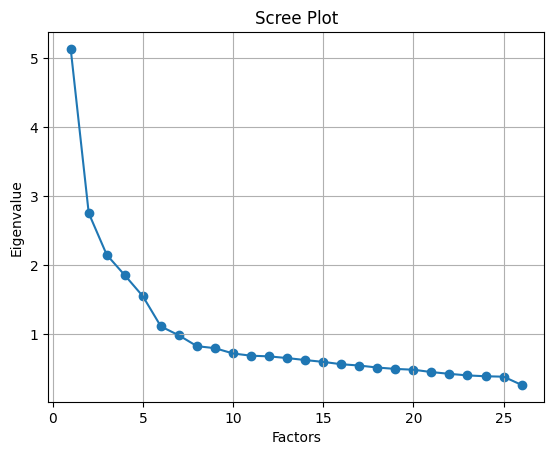

In [5]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# You can create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

REQUEST 2: EXPLAIN THE **EIGENVALUES** AND BASE ON THAT EIGENVALUES CHOOSE THE BEST NUMBER OF FACTOR TO DO THE FACTOR ANALYSIS. EXPLAIN WHY YOU CHOOSE THIS NUMBER

- **Eigenvalue Significance**: Eigenvalues measure the variance in all variables which can be attributed to that factor. The higher the eigenvalue, the more variance that factor explains.
- **Choosing Factors**: The 'elbow' method is used to determine the optimal number of factors. This involves looking for a point where the slope of the eigenvalues levels off, indicating diminishing returns for additional factors.
- **Scree Plot Analysis**: Based on the scree plot description, there's an 'elbow' around the **4th or 5th factor**. This suggests that subsequent factors contribute less to explaining the variance.
- **Recommendation**: I would recommend using **4 or 5 factors** for your factor analysis. This choice is supported by the eigenvalues leveling off after the 5th factor, implying that additional factors would not significantly improve the model's explanatory power.

This approach helps to balance between capturing sufficient variance and maintaining model simplicity. Remember, the goal is to explain the data with the fewest factors possible without losing significant information.

In [6]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
num_factors = int(input('Input the magic number you want: '))
fa = FactorAnalyzer(num_factors, rotation="varimax")
fa.fit(df)
loadings = fa.loadings_
# Get variance of each factor
factor_variance = fa.get_factor_variance()
print(factor_variance)

(array([2.69074704, 2.0357029 , 2.03270415, 1.91862422, 1.28016532,
       1.14676793, 0.4593965 , 0.41540307, 0.35015694, 0.24125198]), array([0.10349027, 0.07829627, 0.07818093, 0.07379324, 0.04923713,
       0.04410646, 0.0176691 , 0.01597704, 0.01346757, 0.00927892]), array([0.10349027, 0.18178654, 0.25996747, 0.3337607 , 0.38299783,
       0.42710429, 0.44477339, 0.46075043, 0.474218  , 0.48349692]))


REQUEST 3: STUDENT LOOK AT THE LOADINGS TABLE EXPLAIN THE SIGNIFICANT OF EACH FACTOR VERSUS EACH PROPERTY. IF THERE ARE FACTOR(S) THAT HAS NO "HIGH LOADING" VALUE, YOU CAN REMOVE THESE AND PERFORM FACTOR ANALYSIS AGAIN WITH THE REMAINING ACTOR. OTHERWISE, EXPLAIN THE FACTOR VARIANCE TABLE

- **Loadings Table**: Look for **high absolute values** (typically above 0.4) in the loadings table to determine the significance of each factor versus each property. A high loading indicates a strong association between the variable and the factor.

- **Factor Variance**:
  - **Total Variance Explained**: The first array represents the eigenvalues, indicating the total variance explained by each factor.
  - **Proportional Variance**: The second array shows the proportion of variance explained by each factor.
  - **Cumulative Variance**: The third array indicates the cumulative variance explained as you add each factor.

- **Removing Factors**: If any factors do not have high loadings, they may not be significant and could be removed. Rerun the analysis with the remaining factors to refine your model.

- **Interpreting Results**: Use the factor variance to understand the overall impact of each factor. A higher value means the factor explains more variance in the dataset.

*Here's a simplified explanation of the factor variance table based on the OCR results:*

```plaintext
Eigenvalues (Total Variance Explained):
- Factor 1: 2.69074704
- Factor 2: 2.0357029
... (and so on for each factor)

Proportional Variance:
- Factor 1: 0.10349027 (10.349027% of the variance)
- Factor 2: 0.07829627 (7.829627% of the variance)
... (and so on for each factor)

Cumulative Variance:
- Factor 1: 0.10349027 (10.349027% of the total variance)
- Factor 2: 0.1878654 (18.78654% of the total variance cumulatively with Factor 1)
... (and so on for each factor)
```

To decide which factors to keep, look at both the loadings and the total variance explained by each factor. Factors that explain a small percentage of the variance and have low loadings across all variables may not be useful. Remember to interpret these results within the context of your specific research question or dataset.

Here's a simplified code snippet to help you with the process:

In [7]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
num_factors = int(input('Input the number of factors you want: '))
fa = FactorAnalyzer(num_factors, rotation="varimax")
fa.fit(df)
loadings = fa.loadings_

# Identify significant loadings
significant_loadings = loadings[abs(loadings) > 0.4]

# Get variance of each factor
factor_variance = fa.get_factor_variance()
print("Total Variance Explained:", factor_variance[0])
print("Proportional Variance:", factor_variance[1])
print("Cumulative Variance:", factor_variance[2])

# Decide whether to remove factors based on loadings
if significant_loadings.size == 0:
    print("Consider removing factors with low loadings and rerun the analysis.")

Total Variance Explained: [2.69074704 2.0357029  2.03270415 1.91862422 1.28016532 1.14676793
 0.4593965  0.41540307 0.35015694 0.24125198]
Proportional Variance: [0.10349027 0.07829627 0.07818093 0.07379324 0.04923713 0.04410646
 0.0176691  0.01597704 0.01346757 0.00927892]
Cumulative Variance: [0.10349027 0.18178654 0.25996747 0.3337607  0.38299783 0.42710429
 0.44477339 0.46075043 0.474218   0.48349692]


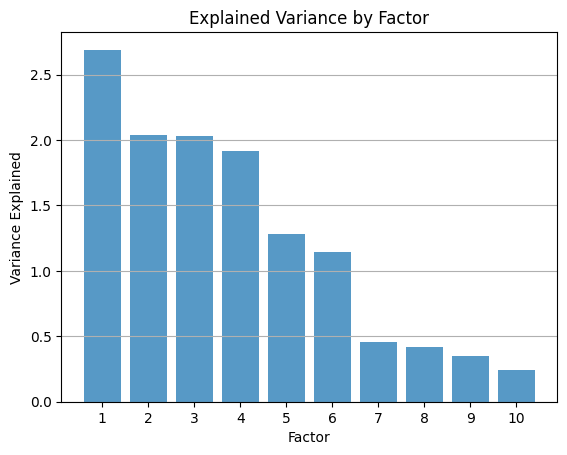

In [8]:
import numpy as np

# Extract the explained variance values
explained_variance = factor_variance[0]

# Plot the explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.75)
plt.title('Explained Variance by Factor')
plt.xlabel('Factor')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(axis='y')
plt.show()